In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the Iris dataset (Replace with your file path if needed)
df = pd.read_csv("Iris.csv")
# Display the first few rows
print("First 5 Rows of Dataset:")
print(df.head())

First 5 Rows of Dataset:
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [ ]:
# Basic statistics (mean, min, max, std)
print("\nDescriptive Statistics:")
print(df.describe())


Descriptive Statistics:
               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000


In [ ]:
#Task 2
# Frequency of each species in the dataset
print("\nSpecies Frequency:")
print(df['Species'].value_counts())


Species Frequency:
Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


In [ ]:
# Choosing two columns for analysis
col1, col2 = "SepalLengthCm", "PetalLengthCm"

In [ ]:
# Calculate Mean, Median, Mode
print(f"\nMeasures of Central Tendency for {col1}:")
print(f"Mean: {df[col1].mean():.2f}, Median: {df[col1].median():.2f}, Mode: {df[col1].mode()[0]:.2f}")

print(f"\nMeasures of Central Tendency for {col2}:")
print(f"Mean: {df[col2].mean():.2f}, Median: {df[col2].median():.2f}, Mode: {df[col2].mode()[0]:.2f}")



Measures of Central Tendency for SepalLengthCm:
Mean: 5.84, Median: 5.80, Mode: 5.00

Measures of Central Tendency for PetalLengthCm:
Mean: 3.76, Median: 4.35, Mode: 1.50


In [ ]:
#Task 3

# Calculate Range, Variance, Standard Deviation
print(f"\nVariability Measures for {col1}:")
print(f"Range: {df[col1].max() - df[col1].min():.2f}, Variance: {df[col1].var():.2f}, Standard Deviation: {df[col1].std():.2f}")

print(f"\nVariability Measures for {col2}:")
print(f"Range: {df[col2].max() - df[col2].min():.2f}, Variance: {df[col2].var():.2f}, Standard Deviation: {df[col2].std():.2f}")


Variability Measures for SepalLengthCm:
Range: 3.60, Variance: 0.69, Standard Deviation: 0.83

Variability Measures for PetalLengthCm:
Range: 5.90, Variance: 3.11, Standard Deviation: 1.76


In [ ]:
#Task 4

# Example 1: T-Test (Is Sepal Length significantly different between two species?)
species1 = "Iris-setosa"
species2 = "Iris-versicolor"

group1 = df[df['Species'] == species1][col1]
group2 = df[df['Species'] == species2][col1]

t_stat, p_value = stats.ttest_ind(group1, group2, equal_var=False)

print(f"\nT-Test: {species1} vs {species2} on {col1}")
print(f"T-Statistic: {t_stat:.4f}, P-Value: {p_value:.4f}")

if p_value < 0.05:
    print("Result: Significant difference in Sepal Length between species.")
else:
    print("Result: No significant difference in Sepal Length.")



T-Test: Iris-setosa vs Iris-versicolor on SepalLengthCm
T-Statistic: -10.5210, P-Value: 0.0000
Result: Significant difference in Sepal Length between species.


In [ ]:
# Example 2: Chi-Square Test (Does species distribution vary significantly?)
species_counts = df['Species'].value_counts()
chi2_stat, chi2_p, dof, expected = stats.chi2_contingency(pd.DataFrame({'Observed': species_counts}))

print("\nChi-Square Test: Species Distribution")
print(f"Chi-Square Statistic: {chi2_stat:.4f}, P-Value: {chi2_p:.4f}")

if chi2_p < 0.05:
    print("Result: Significant difference in species distribution.")
else:
    print("Result: No significant difference in species distribution.")


Chi-Square Test: Species Distribution
Chi-Square Statistic: 0.0000, P-Value: 1.0000
Result: No significant difference in species distribution.


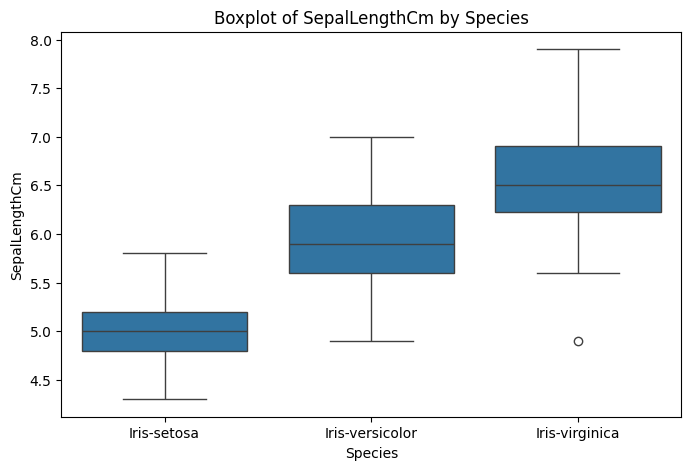

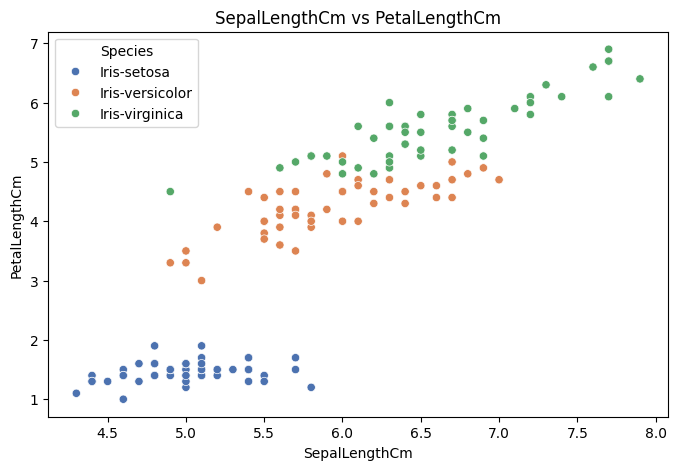

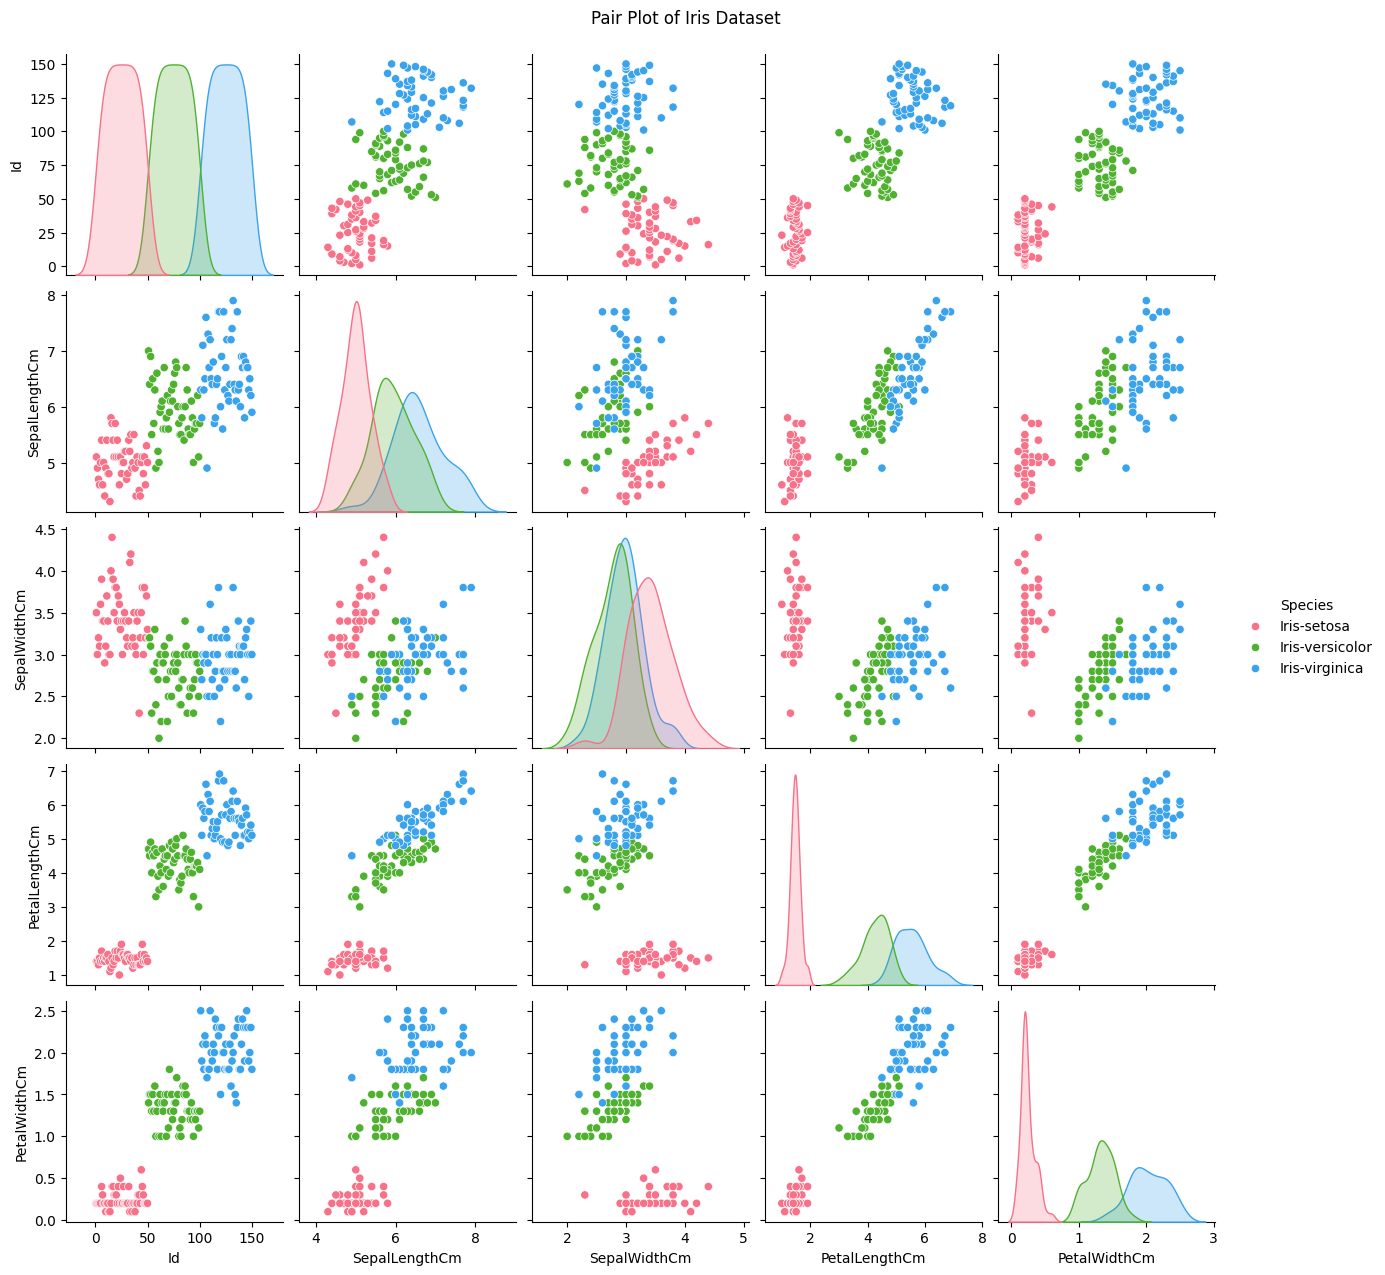

In [ ]:
#Visualisation
# Boxplot for Sepal Length distribution across species
plt.figure(figsize=(8, 5))
sns.boxplot(x="Species", y=col1, data=df)
plt.title(f"Boxplot of {col1} by Species")
plt.show()

# Scatter plot for Sepal Length vs Petal Length
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df[col1], y=df[col2], hue=df["Species"], palette="deep")
plt.title(f"{col1} vs {col2}")
plt.xlabel(col1)
plt.ylabel(col2)
plt.show()

sns.pairplot(df, hue="Species", palette="husl")
plt.suptitle("Pair Plot of Iris Dataset", y=1.02)
plt.show()
